In [1]:
import geopandas as gpd
import geoplot as gplt
import pandas as pd 

## Pre-work: combine two datasets and produce a grouped dataset

In [2]:
gdf_chprov = gpd.read_file('gadm36_CHN_1.json') # from 
df_chncovd = pd.read_csv('COVID-19_geo_timeseries_ver_0311.csv') # from https://www.kaggle.com/datasets/lihyalan/2020-corona-virus-timeseries
df_chncovd = df_chncovd[df_chncovd['country'] == 'China'].drop(columns=['country_flag'])
# gdf_chprov

In [3]:
df_chncovd

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,update_time,data_source,country_code,region
0,Hubei,China,35.86166,104.195397,729,39.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia
1,Guangdong,China,35.86166,104.195397,53,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia
2,Zhejiang,China,35.86166,104.195397,43,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia
3,Beijing,China,35.86166,104.195397,36,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia
4,Chongqing,China,35.86166,104.195397,27,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia
...,...,...,...,...,...,...,...,...,...,...,...
24690,Sichuan,China,35.86166,104.195397,539,3.0,488.0,3/11/2020 14:33,jhu,CHN,Asia
24691,Gansu,China,35.86166,104.195397,127,2.0,88.0,3/11/2020 14:33,jhu,CHN,Asia
24696,Hong Kong,China,35.86166,104.195397,126,3.0,65.0,3/11/2020 18:52,jhu,CHN,Asia
24699,Macau,China,35.86166,104.195397,10,0.0,10.0,3/11/2020 18:52,jhu,CHN,Asia


In [5]:
provgrp = df_chncovd.groupby(by='province')
provgrp

In [7]:
gdf_chprov['NAME_1'] = gdf_chprov['NAME_1'].replace(
    {'Ningxia Hui': 'Ningxia', 'Xinjiang Uygur': 'Xinjiang','Xizang':'Tibet','Nei Mongol':'Inner Mongolia'}
)

In [8]:
provinces = df_chncovd['province'].unique()
geo_povs = gdf_chprov['NAME_1'].unique()
for prov in provinces:
    if prov not in geo_povs:
        print(prov)

Hong Kong
Taiwan
Macau


In [9]:
for prov in geo_povs:
    if prov not in provinces:
        print(prov)

In [11]:
gdf_chprov

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,CHN,China,CHN.1_1,Anhui,Ānhuī,安徽|安徽,Shěng,Province,,CN.AH,"POLYGON ((116.12962 29.82485, 116.05906 30.209..."
1,CHN,China,CHN.2_1,Beijing,Běijīng,北京|北京,Zhíxiáshì,Municipality,,CN.BJ,"POLYGON ((117.37974 40.22687, 117.19398 40.082..."
2,CHN,China,CHN.3_1,Chongqing,Chóngqìng,重慶|重庆,Zhíxiáshì,Municipality,,CN.CQ,"POLYGON ((109.27020 28.50348, 108.99082 28.164..."
3,CHN,China,CHN.4_1,Fujian,Fújiàn,福建,Shěng,Province,,CN.FJ,"POLYGON ((118.17513 24.66486, 118.13458 24.274..."
4,CHN,China,CHN.5_1,Gansu,Gānsù,甘肅|甘肃,Shěng,Province,,CN.GS,"POLYGON ((101.77423 33.54804, 101.54747 33.694..."
5,CHN,China,CHN.6_1,Guangdong,Guǎngdōng,廣東|广东,Shěng,Province,,CN.GD,"POLYGON ((109.75144 21.56570, 109.93542 21.827..."
6,CHN,China,CHN.7_1,Guangxi,Guǎngxī Zhuàngzú,廣西壯族自治區|广西壮族自治区,Zìzhìqu,Autonomous Region,,CN.GX,"POLYGON ((105.54138 23.19367, 105.81052 23.504..."
7,CHN,China,CHN.8_1,Guizhou,Gùizhōu,貴州|贵州,Shěng,Province,,CN.GZ,"POLYGON ((104.53002 24.73437, 104.75211 25.217..."
8,CHN,China,CHN.9_1,Hainan,Hǎinán,海南,Shěng,Province,,CN.HA,"POLYGON ((109.72820 18.31431, 109.15515 18.293..."
9,CHN,China,CHN.10_1,Hebei,Héběi,河北,Shěng,Province,,CN.HB,"MULTIPOLYGON (((116.89429 39.69631, 116.83487 ..."


In [12]:
df_chncovd['update_time'] = pd.to_datetime(df_chncovd['update_time'])

In [15]:
dfhk = df_chncovd[df_chncovd['province'] == 'Hong Kong'].sort_values(by='update_time')
dfhk.head()

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,update_time,data_source,country_code,region
1485,Hong Kong,China,35.861660,104.195397,0,0.0,NaN,2020-01-22 09:28:10,dxy,CHN,Asia
1503,Hong Kong,China,35.861660,104.195397,0,0.0,NaN,2020-01-22 14:23:14,dxy,CHN,Asia
1523,Hong Kong,China,35.861660,104.195397,0,0.0,NaN,2020-01-22 14:25:14,dxy,CHN,Asia
1548,Hong Kong,China,35.861660,104.195397,0,0.0,NaN,2020-01-22 16:39:34,dxy,CHN,Asia
19887,Hong Kong,China,22.396428,114.109497,0,0.0,0.0,2020-01-22 17:00:00,jhu,CHN,Asia


In [16]:
dfhk['data_source'].value_counts()

dxy    555
jhu     50
bno     29
Name: data_source, dtype: int64

In [17]:
import matplotlib.pyplot as plt

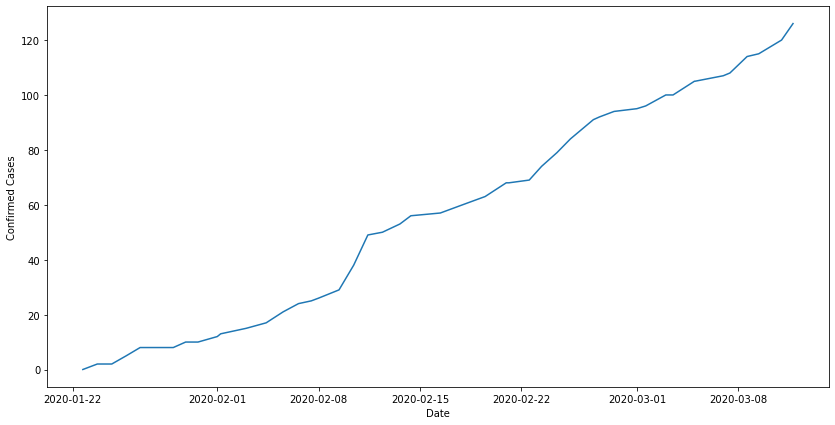

In [18]:
dfjhu = dfhk[dfhk['data_source'] == 'jhu']
plt.figure(figsize=(14,7))
plt.plot(dfjhu['update_time'], dfjhu['confirmed_cases'])
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

### Exercise 1 Create a linechart showing the confirmed trendline of Shanghai and Hong Kong of jhu, try adding legend to make clear which is which (2 mins)

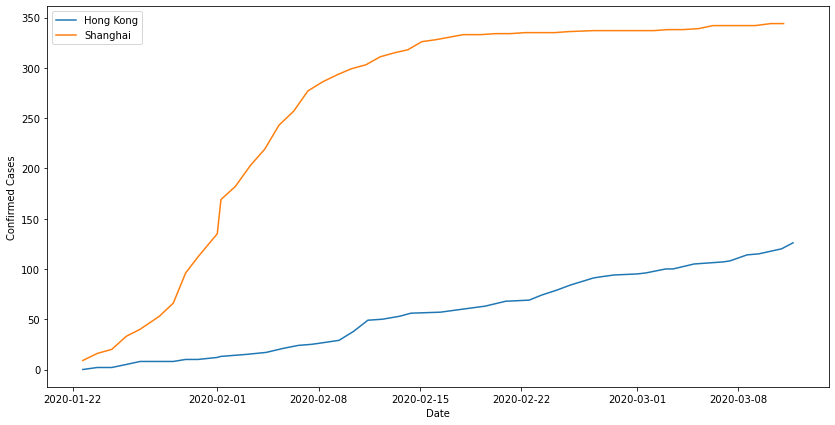

In [19]:
dfhk = df_chncovd[df_chncovd['province'] == 'Hong Kong'].sort_values(by='update_time')
dfsh = df_chncovd[df_chncovd['province'] == 'Shanghai'].sort_values(by='update_time')

dfhkjhu = dfhk[dfhk['data_source'] == 'jhu']
dfshjhu = dfsh[dfsh['data_source'] == 'jhu']
plt.figure(figsize=(14,7))
plt.plot(dfhkjhu['update_time'], dfhkjhu['confirmed_cases'], label='Hong Kong')
plt.plot(dfshjhu['update_time'], dfshjhu['confirmed_cases'], label='Shanghai')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

## Introduction to Geopandas and Shapely
Based on Geopandas documents from https://residentmario.github.io/geoplot/user_guide/Working_with_Geospatial_Data.html

In [30]:
type(gdf_chprov)

geopandas.geodataframe.GeoDataFrame

In [31]:
gdf_chprov.geometry

0     POLYGON ((116.12962 29.82485, 116.05906 30.209...
1     POLYGON ((117.37974 40.22687, 117.19398 40.082...
2     POLYGON ((109.27020 28.50348, 108.99082 28.164...
3     POLYGON ((118.17513 24.66486, 118.13458 24.274...
4     POLYGON ((101.77423 33.54804, 101.54747 33.694...
5     POLYGON ((109.75144 21.56570, 109.93542 21.827...
6     POLYGON ((105.54138 23.19367, 105.81052 23.504...
7     POLYGON ((104.53002 24.73437, 104.75211 25.217...
8     POLYGON ((109.72820 18.31431, 109.15515 18.293...
9     MULTIPOLYGON (((116.89429 39.69631, 116.83487 ...
10    POLYGON ((123.17104 46.24668, 123.00372 46.573...
11    POLYGON ((115.36437 31.40504, 115.22997 31.553...
12    POLYGON ((109.22860 29.12246, 108.86644 29.449...
13    POLYGON ((112.01591 24.73996, 111.47408 24.800...
14    POLYGON ((119.63211 31.13934, 119.15932 31.300...
15    POLYGON ((113.95921 25.45732, 113.91044 25.729...
16    POLYGON ((123.69684 43.37087, 123.47250 43.857...
17    POLYGON ((121.71792 39.44096, 121.43569 39

In [32]:
geosrs = gdf_chprov.geometry

In [34]:
geosrs.to_file(
    'chnprov.geojson',
    driver='GeoJSON'
)

In [35]:
gpd.read_file('chnprov.geojson')

,geometry
0,"POLYGON ((116.12962 29.82485, 116.05906 30.209..."
1,"POLYGON ((117.37974 40.22687, 117.19398 40.082..."
2,"POLYGON ((109.27020 28.50348, 108.99082 28.164..."
3,"POLYGON ((118.17513 24.66486, 118.13458 24.274..."
4,"POLYGON ((101.77423 33.54804, 101.54747 33.694..."
5,"POLYGON ((109.75144 21.56570, 109.93542 21.827..."
6,"POLYGON ((105.54138 23.19367, 105.81052 23.504..."
7,"POLYGON ((104.53002 24.73437, 104.75211 25.217..."
8,"POLYGON ((109.72820 18.31431, 109.15515 18.293..."
9,"MULTIPOLYGON (((116.89429 39.69631, 116.83487 ..."


In [36]:
geosrs.to_file(
    'geoshp.shp',
    driver='ESRI Shapefile'
)

In [27]:
gdf_chprov.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### More on the Geometric Processing
- Spherical Coordinates
- Cartesian Coordinates
<br> Parallel posture

In [37]:
nyc_map_pluto_sample = gpd.read_file(gplt.datasets.get_path('nyc_map_pluto_sample'))
nyc_map_pluto_sample

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,Shape_Leng,Shape_Area,geometry
0,MN,1,10,101,5,1022,02,1,10004,E007,...,None,0.000000e+00,None,1,1,1,18v2.1,12277.824113,7.550340e+06,"POLYGON ((979561.871 191884.249, 979585.211 19..."
1,MN,1,101,101,1,1001,02,1,10004,E007,...,None,0.000000e+00,None,1,None,1,18v2.1,3940.840373,5.018974e+05,"POLYGON ((972382.826 190647.267, 972301.458 19..."
2,MN,1,101,101,1,1001,02,1,10004,E007,...,None,0.000000e+00,None,1,None,1,18v2.1,3940.840373,5.018974e+05,"POLYGON ((972428.829 190679.175, 972443.245 19..."
3,MN,1,101,101,1,1001,02,1,10004,E007,...,None,0.000000e+00,None,1,None,1,18v2.1,3940.840373,5.018974e+05,"POLYGON ((972058.340 190689.280, 972122.088 19..."
4,MN,1,201,101,1,1000,02,1,10004,E007,...,None,0.000000e+00,None,1,None,1,18v2.1,6306.268341,1.148539e+06,"POLYGON ((973154.712 194614.331, 973733.156 19..."
5,MN,2,1,101,9,1025,02,1,10004,L015,...,None,1.000020e+09,08/07/2012,1,1,1,18v2.1,2721.060649,1.008250e+05,"POLYGON ((980915.002 194319.140, 980907.783 19..."
6,MN,2,2,101,9,1025,02,1,10004,L015,...,None,1.000020e+09,08/07/2012,1,1,1,18v2.1,2411.869687,8.724423e+04,"POLYGON ((981169.004 194678.821, 981168.874 19..."


In [38]:
nyc_map_pluto_sample.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [39]:
gdf_chprov.head(4)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,CHN,China,CHN.1_1,Anhui,Ānhuī,安徽|安徽,Shěng,Province,,CN.AH,"POLYGON ((116.12962 29.82485, 116.05906 30.209..."
1,CHN,China,CHN.2_1,Beijing,Běijīng,北京|北京,Zhíxiáshì,Municipality,,CN.BJ,"POLYGON ((117.37974 40.22687, 117.19398 40.082..."
2,CHN,China,CHN.3_1,Chongqing,Chóngqìng,重慶|重庆,Zhíxiáshì,Municipality,,CN.CQ,"POLYGON ((109.27020 28.50348, 108.99082 28.164..."
3,CHN,China,CHN.4_1,Fujian,Fújiàn,福建,Shěng,Province,,CN.FJ,"POLYGON ((118.17513 24.66486, 118.13458 24.274..."


In [41]:
thepoly = gdf_chprov.geometry[4]
thecvh = thepoly.convex_hull

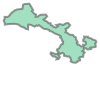

In [42]:
thepoly

In [ ]:
# print(thepoly)

In [44]:
type(thepoly)

shapely.geometry.polygon.Polygon

- Point
- MultiPoint
- LineString
- Polygon
- MultiPolygon

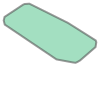

In [45]:
thecvh

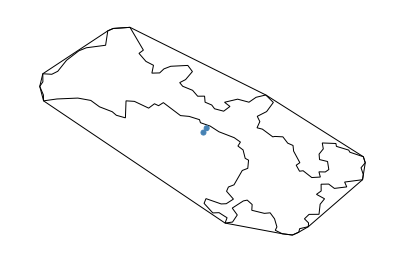

In [46]:
import geoplot.crs as gcrs

ctr = gdf_chprov.geometry[0].centroid
poly = gdf_chprov.geometry[0]

ax = gplt.pointplot(
    gpd.GeoDataFrame(geometry=[thepoly.centroid, thecvh.centroid]),
    figsize=(7,7)
)

ax = gplt.polyplot(
    gpd.GeoDataFrame(geometry=[thepoly, thecvh]),
    ax=ax
)
plt.show()

In [ ]:
# gdf_chprov[gdf_chprov['NAME_1'].isin(['Shanghai', 'Jiangsu'])].geometry

In [47]:
Shply = gdf_chprov[gdf_chprov['NAME_1'].isin(['Shanghai', 'Jiangsu'])].geometry[23]
Jsply = gdf_chprov[gdf_chprov['NAME_1'].isin(['Shanghai', 'Jiangsu'])].geometry[14]

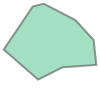

In [48]:
Shply

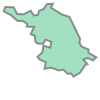

In [49]:
Jsply

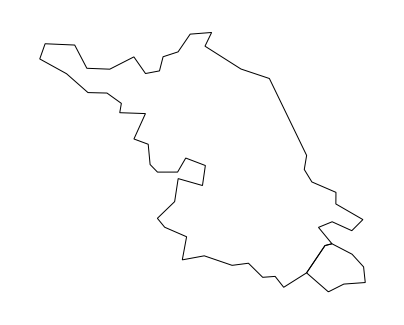

In [50]:
gplt.polyplot(
    gpd.GeoDataFrame(geometry=[Shply, Jsply]),
    figsize=(7,7)
)
plt.show()

In [51]:
from shapely.ops import triangulate, unary_union

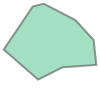

In [52]:
Shply

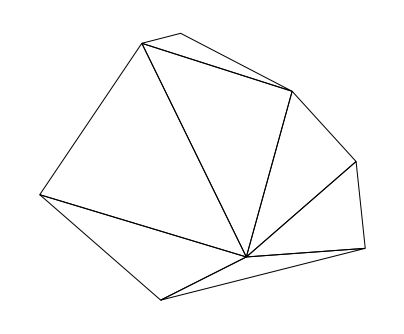

In [53]:
# thepoly.contains(thecvh.centroid)
gplt.polyplot(
    gpd.GeoDataFrame(geometry=triangulate(Shply)),
    figsize=(7,7)
)
plt.show()

In [ ]:
unary_union()

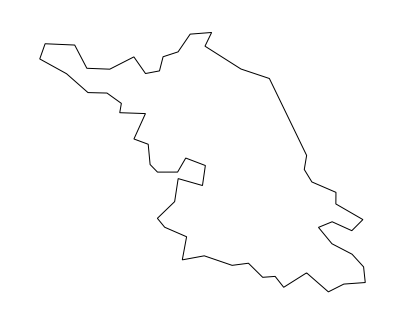

In [56]:
gplt.polyplot(
    gpd.GeoDataFrame(geometry=[unary_union([Shply, Jsply])]),
    figsize=(7,7)
)
plt.show()

## Make Choropleth for the total number of confirmed cases

In [57]:
import numpy as np

In [58]:
df_chncovd

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,update_time,data_source,country_code,region
0,Hubei,China,35.86166,104.195397,729,39.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia
1,Guangdong,China,35.86166,104.195397,53,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia
2,Zhejiang,China,35.86166,104.195397,43,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia
3,Beijing,China,35.86166,104.195397,36,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia
4,Chongqing,China,35.86166,104.195397,27,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia
...,...,...,...,...,...,...,...,...,...,...,...
24690,Sichuan,China,35.86166,104.195397,539,3.0,488.0,2020-03-11 14:33:00,jhu,CHN,Asia
24691,Gansu,China,35.86166,104.195397,127,2.0,88.0,2020-03-11 14:33:00,jhu,CHN,Asia
24696,Hong Kong,China,35.86166,104.195397,126,3.0,65.0,2020-03-11 18:52:00,jhu,CHN,Asia
24699,Macau,China,35.86166,104.195397,10,0.0,10.0,2020-03-11 18:52:00,jhu,CHN,Asia


In [62]:
# df_chncovd['update_time'].describe()
# First we need to find such data for each provinces:
df_confirmed = df_chncovd.groupby(by='province').apply(lambda df: df[df['update_time']== max(df['update_time'])])[
    ['confirmed_cases','deaths','recovered','province']
]

In [63]:
df_confirmed = df_confirmed[df_confirmed['confirmed_cases']>0].set_index('province')

In [65]:
gdf_ch = pd.concat(
    [gdf_chprov.set_index('NAME_1'), df_confirmed], axis=1
)
gdf_ch = gdf_ch.dropna()

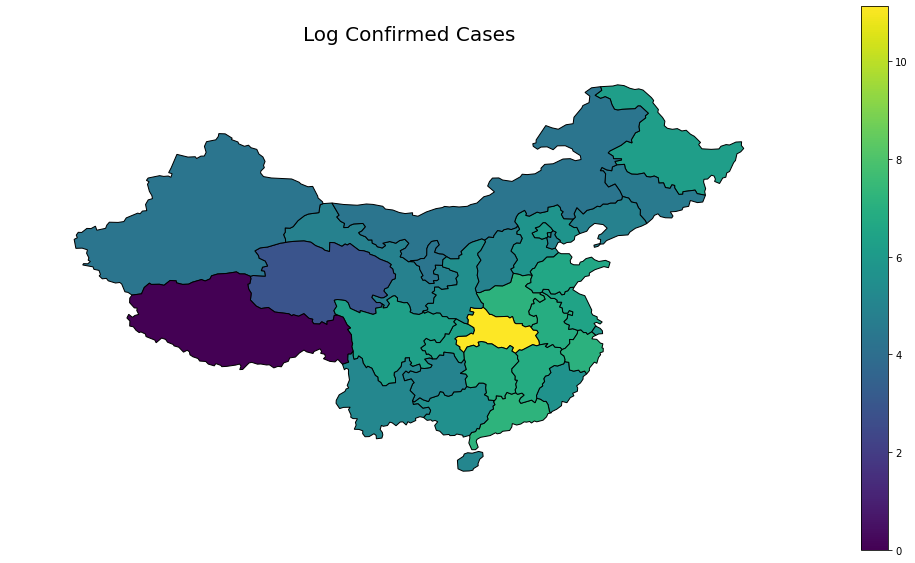

In [68]:
fig, ax = plt.subplots(figsize=(18,10))
gdf_ch['cfmed_log'] = np.log(gdf_ch['confirmed_cases'])
gplt.choropleth(
    gdf_ch,
    hue='cfmed_log',
    legend=True,
    ax=ax
)
plt.title("Log Confirmed Cases", fontsize=20)
plt.show()

### Exercise 2: Create a choropleth of confirmed death using log scale 

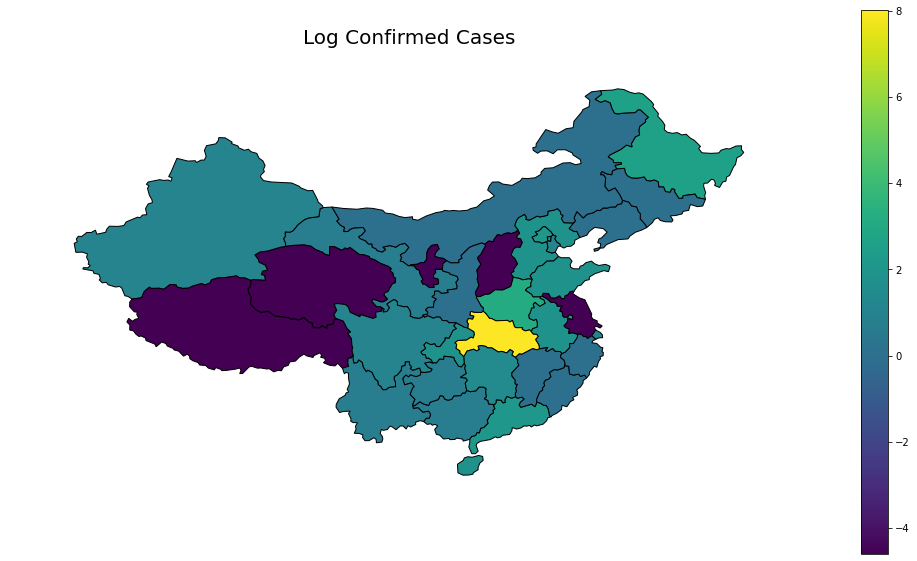

In [69]:
fig, ax = plt.subplots(figsize=(18,10))
gdf_ch['death_log'] = np.log(gdf_ch['deaths']+1e-2) ## The trick being adding some pertubations in the data
gplt.choropleth(
    gdf_ch,
    hue='death_log',
    legend=True,
    ax=ax
)
plt.title("Log Confirmed Cases", fontsize=20)
plt.show()

In [ ]:
gdf_ch

In [ ]:
dc_roads.head()